In [1]:
import csv
import math
import time
import warnings
import operator
import statistics
import seaborn as sns
import pandas as pd
import numpy as np
import geopy.distance
import matplotlib.pyplot as plt

from dateutil.parser import parse
from datetime import datetime
from scipy import stats
from IPython.display import display_html
from multiprocessing import Pool
from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df_basedata = pd.read_csv('gs://aes-datahub-0002-curated/Outage_Restoration/Historical_Data/Master_Dataset/OMS_IPL_OUTAGE_BASEDATA_09162020.csv', index_col=0)
print(list(df_basedata.columns))

['OUTAGE_ID', 'INCIDENT_ID', 'STRCTUR_NO', 'EVENT', 'CREATION_DATETIME', 'ENERGIZED_DATETIME', 'CIRCT_ID', 'DNI_EQUIP_TYPE', 'SUBST_ID', 'CALL_QTY', 'DOWNSTREAM_CUST_QTY', 'KEY_CUST_QTY', 'ETR_DATETIME', 'CUST_QTY', 'DAY_FLAG', 'TTR', 'POLE_CLUE_FLG', 'PART_LIGHT_CLUE_FLG', 'EMERGENCY_CLUE_FLG', 'POWER_OUT_CLUE_FLG', 'OPEN_DEVICE_CLUE_FLG', 'TREE_CLUE_FLG', 'WIRE_DOWN_CLUE_FLG', 'IVR_CLUE_FLG', 'EQUIPMENT_CLUE_FLG', 'TRANSFORMER_CLUE_FLG', 'OH_CAUSE_FLG', 'UG_CAUSE_FLG', 'ANIMAL_CAUSE_FLG', 'WEATHER_CAUSE_FLG', 'WEATHER_COLD_CAUSE_FLG', 'PUBLIC_CAUSE_FLG', 'WEATHER_LIGHTNING_CAUSE_FLG', 'WEATHER__SNOW_CAUSE_FLG', 'WEATHER__WIND_CAUSE_FLG', 'WEATHER__HEAT_CAUSE_FLG', 'CUST_REQUEST_CAUSE_FLG', 'WEATHER__FLOOD_CAUSE_FLG', 'STREET_CAUSE_FLG', 'SUBSTATION_CAUSE_FLG', 'TREE_CAUSE_FLG', 'MISCELLANEOUS_CAUSE_FLG', 'NO_CAUSE_FLG', 'PLANNED_CAUSE_FLG', 'NO_OUTAGE_CAUSE_FLG', 'FUSE_OCCURN_FLG', 'CUST_EQUIP_OCCURN_FLG', 'POLE_OCCURN_FLG', 'TRANSFORMER_OCCURN_FLG', 'METER_OCCURN_FLG', 'SERVICE_OCCU

In [4]:
df_outages = df_basedata.groupby(['Period'],as_index=False).agg({'OUTAGE_ID' : 'count'})
df_outages.rename({'OUTAGE_ID' : 'No_of_outages'}, axis=1, inplace=True)
df_outages_v1 = df_outages[df_outages.No_of_outages>1200]

In [5]:
df_outages['Year'] = df_outages.Period.apply(lambda x: '2019' if (x.lower().find('2019') != -1) else 0)

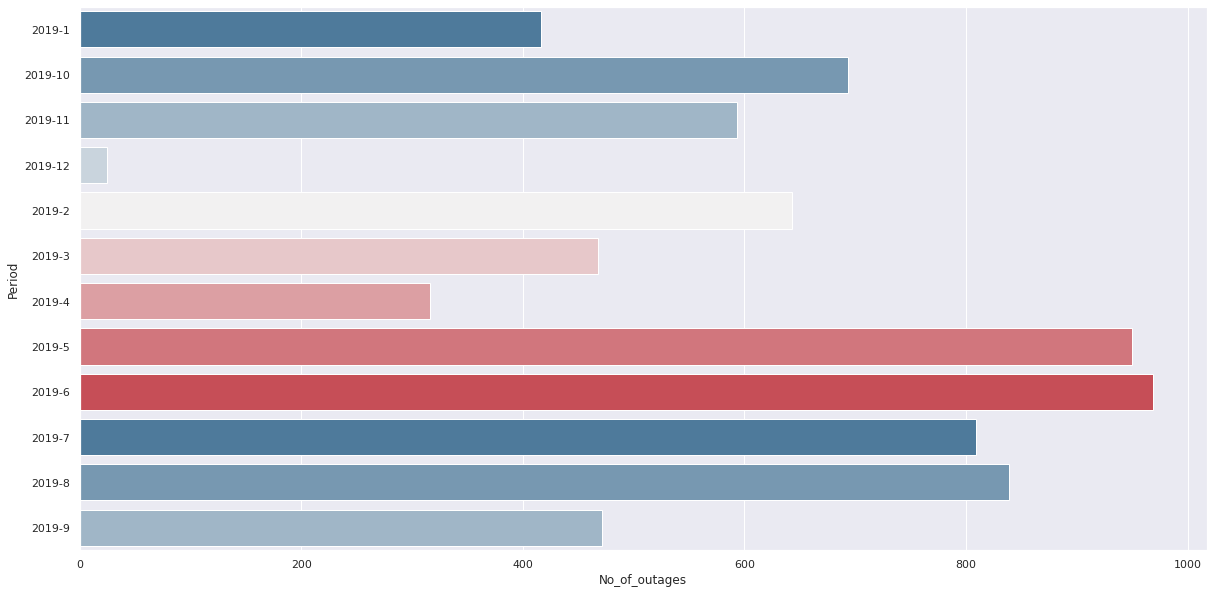

In [7]:
sns.set(style="white")
sns.set(rc={'figure.figsize':(18,10)})
ax = sns.barplot(x="No_of_outages", y="Period", data=df_outages[df_outages['Year'] == '2019'], palette = sns.diverging_palette(240, 10, n=9))

In [15]:
df_basedata_v1 = df_basedata[df_basedata['Period'] == '2019-6']

In [16]:
df_basedata_v1.EVENT.unique()

array(['BLUE SKY', 'STORM'], dtype=object)

In [17]:
df_basedata_v1 = df_basedata_v1[df_basedata_v1['EVENT'] == 'STORM']

In [18]:
df_basedata_v1.shape

(269, 159)

In [19]:
df_basedata_v1['CREATION_DATETIME'] = pd.to_datetime(df_basedata_v1['CREATION_DATETIME'])

In [20]:
df_basedata_v1['Date'] = df_basedata_v1['CREATION_DATETIME'].dt.date
df_basedata_v1['Date'] = df_basedata_v1['Date'].astype(str)

In [21]:
df_basedata_v1['Date'].unique()

array(['2019-06-15', '2019-06-16', '2019-06-17', '2019-06-19',
       '2019-06-20', '2019-06-23', '2019-06-24'], dtype=object)